In [172]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [173]:
url = '/Users/alyona/Downloads/g-research-crypto-forecasting/asset_details.csv'
asset_details = pd.read_csv(url) 
#df = df[['Asset_ID','Asset_Name']]
#df = df.set_index(['Asset_ID'])
#dict1 = df.to_dict('index')
#dict1[2]
#asset_details = asset_details.set_index(['Asset_ID'])

In [174]:
# import all data
#url_asset = '/Users/alyona/Downloads/g-research-crypto-forecasting/asset_details.csv'
url_train = '/Users/alyona/Downloads/g-research-crypto-forecasting/train.csv'
#url_sup_train = '/Users/alyona/Downloads/g-research-crypto-forecasting/supplemental_train.csv'
#url_test = '/Users/alyona/Downloads/g-research-crypto-forecasting/example_test.csv'
#asset_details = pd.read_csv(url_asset)
train = pd.read_csv(url_train) 
#sub_train = pd.read_csv(url_sup_train) 
#test = pd.read_csv(url_test) 

In [175]:
# get the data only for one cripto
train_1 = train[(train.Asset_ID ==1)]

# difference in close price
train_1['diff'] = train_1['Close'].diff()

# drop the first row becaouse it is NaN
train_1 = train_1.drop(2,axis=0)
train_1 = train_1.drop(24236795,axis=0)

# get the list of the indexes
list_ind = train_1.index.tolist()

<ipython-input-175-18d3bf5488f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['diff'] = train_1['Close'].diff()


In [114]:
train_1 = train_1.drop('Target',axis=1)

In [ ]:
train_1 = train_1.drop(24236795,axis=0)
train_1 = train_1.drop(24236795,axis=0)
train_1 = train_1.drop(24236795,axis=0)

In [191]:
# calculate mean, sd, and splitting points
mean = train_1['diff'].mean()
sd = train_1['diff'].var()**0.5

st1 = mean - 2*sd
st2 = mean - sd
st3 = mean
st4 = mean + sd
st5 = mean + 2*sd
# DO GRID RESEARCH FOR THE BEST SPLIT POINTS

In [162]:
train_1['st1'] = 0
train_1['st2'] = 0
train_1['st3'] = 0
train_1['st4'] = 0
train_1['st5'] = 0
train_1['st6'] = 0

In [163]:
for i in list_ind:
    if train_1['diff'][i] < st1:
        train_1['st1'][i] = 1
    elif train_1['diff'][i] > st1 and train_1['diff'][i] < st2:
        train_1['st2'][i] = 1
    elif train_1['diff'][i] > st2 and train_1['diff'][i] < st3:
        train_1['st3'][i] = 1
    elif train_1['diff'][i] > st3 and train_1['diff'][i] < st4:
        train_1['st4'][i] = 1
    elif train_1['diff'][i] > st4 and train_1['diff'][i] < st5:
        train_1['st5'][i] = 1
    elif train_1['diff'][i] > st5:
        train_1['st6'][i] = 1

<ipython-input-163-69e5df19d5a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['st3'][i] = 1
<ipython-input-163-69e5df19d5a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['st2'][i] = 1
<ipython-input-163-69e5df19d5a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['st5'][i] = 1
<ipython-input-163-69e5df19d5a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [167]:
train_1['st1'].sum()+train_1['st2'].sum()+train_1['st3'].sum()+train_1['st4'].sum()+train_1['st5'].sum()+train_1['st6'].sum() == len(train_1)

True

In [176]:
from datetime import datetime
train_1["timestamp"] = [datetime.fromtimestamp(x) for x in train_1["timestamp"]]
train_1 = train_1.set_index('timestamp')
train_1 = train_1.resample("H").mean()

In [185]:
train_1

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,diff
timestamp,,,,,,,,,,
2018-01-01 01:00:00,1.0,309.327586,13664.300862,13831.839828,13487.988621,13661.642224,49.673239,13660.494250,-0.002071,-3.511414
2018-01-01 02:00:00,1.0,269.233333,13554.013670,13685.381000,13441.025666,13549.019713,48.100297,13548.321840,-0.003012,-5.159367
2018-01-01 03:00:00,1.0,269.483333,13391.466157,13515.038833,13285.307667,13394.221983,39.802738,13392.182376,0.000185,1.275333
2018-01-01 04:00:00,1.0,271.200000,13530.280850,13730.786667,13424.299071,13532.761849,41.530155,13531.651044,0.000643,1.391900
2018-01-01 05:00:00,1.0,242.550000,13530.573567,13740.562167,13413.159404,13534.373375,37.158874,13533.150693,0.002557,2.601267
...,...,...,...,...,...,...,...,...,...,...
2021-09-20 21:00:00,1.0,3817.416667,43417.518591,43487.848721,43356.831000,43425.837525,153.398982,43422.592935,0.000649,7.647310
2021-09-20 22:00:00,1.0,2048.050000,43652.976819,43690.215798,43608.291333,43647.505173,69.612200,43648.622558,0.000014,-5.287857
2021-09-20 23:00:00,1.0,1556.116667,43687.488033,43724.059038,43647.334167,43686.842130,44.603653,43686.785011,-0.001026,-0.485405


In [187]:
train_1 = train_1.fillna(method='ffill')
null_data = train_1[train_1.isnull().any(axis=1)]
null_data

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,diff
timestamp,,,,,,,,,,


### use lags
check the correlation between the assets

In [53]:
train_1.corr()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,diff
Asset_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,NaN,1.000000,0.657281,0.657969,0.656531,0.657269,0.636348,0.657266,0.024432,-0.061585
Open,NaN,0.657281,1.000000,0.999996,0.999997,1.000000,0.073244,1.000000,-0.016987,0.003592
High,NaN,0.657969,0.999996,1.000000,0.999989,0.999996,0.073951,0.999996,-0.016911,0.003637
Low,NaN,0.656531,0.999997,0.999989,1.000000,0.999997,0.072422,0.999997,-0.016943,0.003856
Close,NaN,0.657269,1.000000,0.999996,0.999997,1.000000,0.073233,1.000000,-0.016918,0.003800
Volume,NaN,0.636348,0.073244,0.073951,0.072422,0.073233,1.000000,0.073228,0.069398,-0.050560
VWAP,NaN,0.657266,1.000000,0.999996,0.999997,1.000000,0.073228,1.000000,-0.016940,0.003734
Target,NaN,0.024432,-0.016987,-0.016911,-0.016943,-0.016918,0.069398,-0.016940,1.000000,0.331304
diff,NaN,-0.061585,0.003592,0.003637,0.003856,0.003800,-0.050560,0.003734,0.331304,1.000000


In [55]:
train_1 = train_1[['Count','Close']]

<AxesSubplot:xlabel='timestamp'>

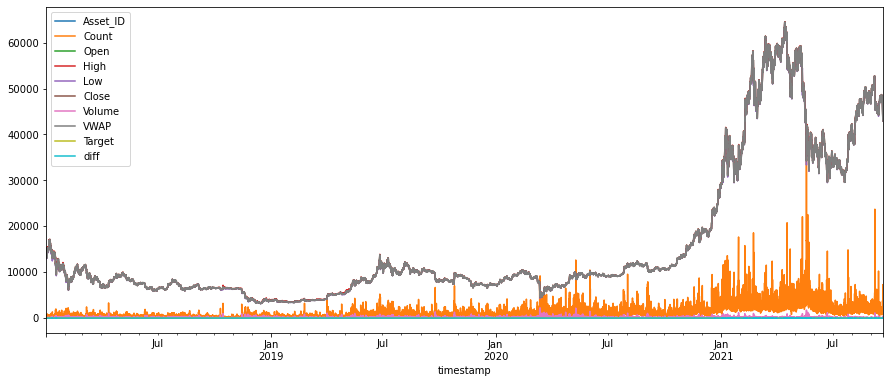

In [188]:
train_1.plot(figsize=(15, 6))
# VOLUM IS THE SAME!!

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [117]:
train_1.isnull().sum().sum()

36

In [193]:
train_1.head()

,Count,Open,High,Low,Close,Volume,VWAP,Target,diff
timestamp,,,,,,,,,
2018-01-01 01:00:00,309.327586,13664.300862,13831.839828,13487.988621,13661.642224,49.673239,13660.494250,-0.002071,-3.511414
2018-01-01 02:00:00,269.233333,13554.013670,13685.381000,13441.025666,13549.019713,48.100297,13548.321840,-0.003012,-5.159367
2018-01-01 03:00:00,269.483333,13391.466157,13515.038833,13285.307667,13394.221983,39.802738,13392.182376,0.000185,1.275333
2018-01-01 04:00:00,271.200000,13530.280850,13730.786667,13424.299071,13532.761849,41.530155,13531.651044,0.000643,1.391900
2018-01-01 05:00:00,242.550000,13530.573567,13740.562167,13413.159404,13534.373375,37.158874,13533.150693,0.002557,2.601267


In [192]:
train_1 = train_1.drop('Asset_ID',axis=1)

In [189]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [194]:
grangers_causation_matrix(train_1, variables = train_1.columns) 

,Count_x,Open_x,High_x,Low_x,Close_x,Volume_x,VWAP_x,Target_x,diff_x
Count_y,1.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
Open_y,0.0,1.0,0.0,0.0,0.0,0.0001,0.0,0.0,0.0
High_y,0.0,0.0,1.0,0.0,0.0,0.0113,0.0,0.0,0.0
Low_y,0.0,0.0,0.0,1.0,0.0,0.0000,0.0,0.0,0.0
Close_y,0.0,0.0,0.0,0.0,1.0,0.0000,0.0,0.0,0.0
Volume_y,0.0,0.0,0.0,0.0,0.0,1.0000,0.0,0.0,0.0
VWAP_y,0.0,0.0,0.0,0.0,0.0,0.0000,1.0,0.0,0.0
Target_y,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1.0,0.0
diff_y,0.0,0.0,0.0,0.0,0.0,0.0074,0.0,0.0,1.0


In [195]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Count  ::  29921.87  > 179.5199  =>   True
Open   ::  15088.43  > 143.6691  =>   True
High   ::  10279.73  > 111.7797  =>   True
Low    ::  6329.24   > 83.9383   =>   True
Close  ::  2787.67   > 60.0627   =>   True
Volume ::  1527.39   > 40.1749   =>   True
VWAP   ::  643.97    > 24.2761   =>   True
Target ::  157.25    > 12.3212   =>   True
diff   ::  0.11      > 4.1296    =>   False


In [197]:
len(train_1)*0.2

6523.400000000001

In [199]:
nobs = 6523
df_train, df_test = train_1[0:-nobs], train_1[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(26094, 9)
(6523, 9)


In [200]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [201]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Count" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3397
 No. Lags Chosen       = 47
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3576
 No. Lags Chosen       = 47
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.9798. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

In [202]:
df_differenced = df_train.diff().dropna()

In [203]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Count" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -36.339
 No. Lags Chosen       = 46
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -23.1847
 No. Lags Chosen       = 49
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

In [204]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  16.56280180676161
BIC :  16.590980733749284
FPE :  15600317.227347426
HQIC:  16.5719037803707 

Lag Order = 2
AIC :  15.598364822872071
BIC :  15.651906585003461
FPE :  5946805.991212611
HQIC:  15.615659186151918 

Lag Order = 3
AIC :  15.070681810185425
BIC :  15.149588113722755
FPE :  3508439.176916915
HQIC:  15.096169144339429 

Lag Order = 4
AIC :  14.748593079096274
BIC :  14.852865630484292
FPE :  2542333.9529847326
HQIC:  14.78227396539172 

Lag Order = 5
AIC :  14.522690222670013
BIC :  14.652330728536015
FPE :  2028262.8699070795
HQIC:  14.56456524243807 

Lag Order = 6
AIC :  14.337638366013085
BIC :  14.492648533166935
FPE :  1685610.5869007842
HQIC:  14.387708100648817 

Lag Order = 7
AIC :  14.217453180136602
BIC :  14.397834715570774
FPE :  1494725.6985534034
HQIC:  14.275718211098981 

Lag Order = 8
AIC :  14.125541802253549
BIC :  14.331296413143138
FPE :  1363467.8933521048
HQIC:  14.192002711065463 

Lag Order = 9
AIC :  14.037223281616523
BIC :  

<AxesSubplot:ylabel='Frequency'>

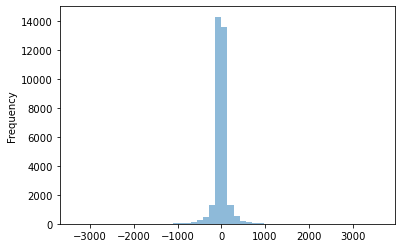

In [209]:
train_1.plot.hist(bins=50, alpha=0.5)

In [311]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [85]:
df_grouped = train.groupby(['Asset_ID'], as_index=False)['Asset_ID'].sum()

In [86]:
df_grouped

,Asset_ID
0,0
1,1956282
2,3907074
3,5375601
4,4627464
5,9775700
6,11737200
7,13657889
8,12736568
9,17604270


In [298]:
df = pd.read_csv("right_small.csv")
df

,Unnamed: 0,dimension_5,right_oligarch_1,right_oligarch_2,emp
0,18108,-1.985358,-0.145489,-0.133112,0.0
1,18178,-1.591579,-0.145489,-0.133112,1.0
2,18265,-1.399425,-0.145489,-0.133112,2.0
3,18316,-0.290824,-0.145489,4.829809,1.0
4,18486,-1.723601,-0.145489,-0.133112,2.0
...,...,...,...,...,...
12441,1075437,-1.637904,-0.145489,-0.133112,3.0
12442,1077483,0.000000,-0.145489,4.829809,3.0
12443,1081539,0.000000,-0.145489,4.829809,0.0
12444,1083296,-2.365479,-0.145489,-0.133112,0.0


In [333]:
#df['emp'] = df['emp'] + 1
df['emp'] = np.log(df['emp']+1)
df
#wated MA

,Unnamed: 0,dimension_5,right_oligarch_1,right_oligarch_2,emp
0,18108,-1.985358,-0.145489,-0.133112,0.441230
1,18178,-1.591579,-0.145489,-0.133112,0.486000
2,18265,-1.399425,-0.145489,-0.133112,0.514321
3,18316,-0.290824,-0.145489,4.829809,0.486000
4,18486,-1.723601,-0.145489,-0.133112,0.514321
...,...,...,...,...,...
12441,1075437,-1.637904,-0.145489,-0.133112,0.534383
12442,1077483,0.000000,-0.145489,4.829809,0.534383
12443,1081539,0.000000,-0.145489,4.829809,0.441230
12444,1083296,-2.365479,-0.145489,-0.133112,0.441230


In [337]:
df111 = df.groupby('emp', as_index=False)['right_oligarch_1'].mean()
#df111.set_index('emp')
X = df111['emp'].tolist()
Y = df111['right_oligarch_1'].tolist()

In [330]:
df111 = df.groupby('emp', as_index=False)['right_oligarch_1'].max()
#df111.set_index('emp')
XX = df111['emp'].tolist()
YY = df111['right_oligarch_1'].tolist()

In [334]:

X = df['emp'].tolist()
Y = df['right_oligarch_1'].tolist()

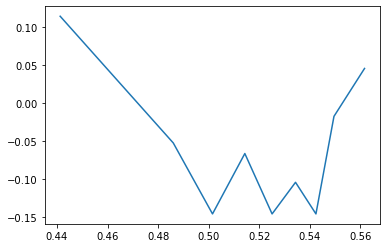

In [338]:
plt.plot(X,Y)
#plt.plot(XX,YY)